In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors, metrics
import pickle

In [2]:
  X_ip = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
  y_ip = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
  names_ip = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',	'Grass-pasture','Grass-trees',
           'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
           'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']
  

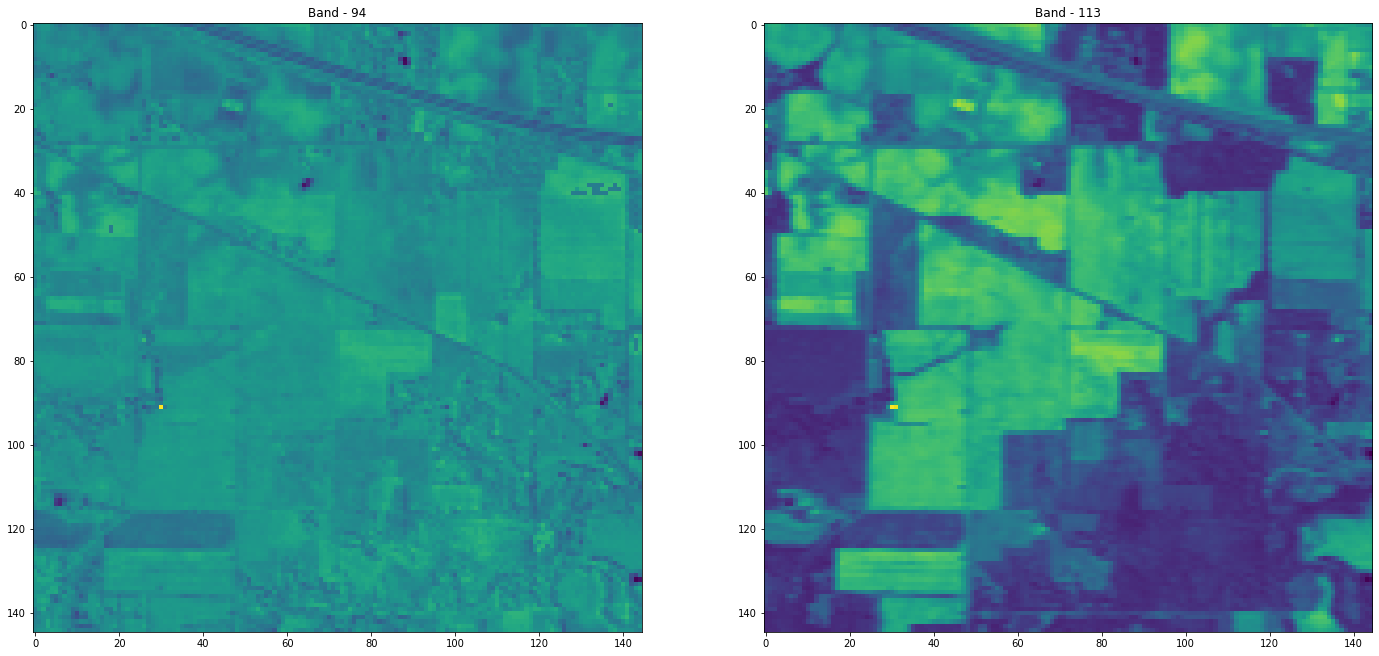

In [3]:
fig = plt.figure(figsize = (24, 12))

for j in range(1,3):
  fig.add_subplot(1,2,j)
  band= np.random.randint(X_ip.shape[2])
  plt.imshow(X_ip[:,:,band])
  plt.title(f'Band - {band}')

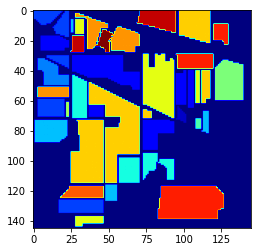

In [4]:
imgplot = plt.imshow(y_ip, cmap='jet')

## REDUCCIÓN DIMENSIONALIDAD

In [3]:
dt = X_ip.reshape(-1, X_ip.shape[2])
df = pd.DataFrame(data = dt)
df = pd.concat([df, pd.DataFrame(data = y_ip.ravel())], axis = 1) #concatenamos df, que es la imagen normal convertida a DataFrame con y, que son los datos de salida(resultados). 
                                                               #El .ravel lo que hace es transofrmar y (145x145) a un array de una dimension (145x1)
df.columns= [f'band{i}' for i in range(1, 1+X_ip.shape[2])]+['class']
df.to_csv('Dataset.csv')
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [6]:
df.iloc[:, :].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579,4.224923
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921,5.281972
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000,0.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000,0.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000,0.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000,10.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000,16.000000


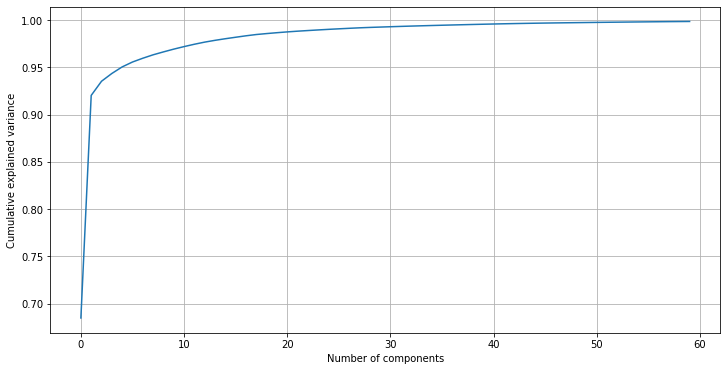

In [4]:
n=60
pca = PCA(n)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values) #Para realizar el PCA quitamos la columna de clases o resultados, puesto que lo que queremos es reducir las bandas

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [5]:
n=40
pca = PCA(n)
dt = pca.fit_transform(df.iloc[:, :-1].values) 
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y_ip.ravel())], axis = 1) #Una vez realizada la reducción de dimensionalidad volvemos a anexar las clases o resultados.
q.columns = [f'PC-{i}' for i in range(1,n+1)]+['class'] #q será el Dataframe de la imagen original pero en vez de con 200 bandas con las 40 del PCA
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,5014.905985,1456.863260,72.697049,71.204926,-435.686978,-68.840340,134.809844,-304.372417,256.433035,-66.631065,...,19.518009,-2.410178,20.692980,-19.865193,-29.717621,-25.942804,-2.968747,63.058823,9.797625,3
1,5601.383743,-2023.450087,350.134661,-528.465052,148.088301,-288.359043,202.956838,240.848022,-474.857802,93.493698,...,97.695077,-81.808998,-51.072220,30.026571,13.117761,25.083676,4.336883,15.781070,43.426673,3
2,5796.135442,-3090.394852,490.539929,-760.214345,259.933305,-131.611182,172.927283,205.911245,572.491929,-191.622322,...,36.214818,-37.261251,-15.444316,23.152301,33.041848,15.557169,18.478629,-37.512275,83.011728,3
3,5586.204575,-2369.376085,356.274719,-502.687154,146.554953,-306.679341,251.071081,234.966473,-314.023209,54.962158,...,127.902133,-64.136455,33.753787,21.682646,65.406239,10.624988,50.949105,4.216979,58.332803,3
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495441,-438.266724,502.715450,-345.536551,-188.352680,-67.506070,...,-83.007416,74.001797,182.574195,-9.567382,-15.688261,10.462551,-2.004205,63.578250,13.452507,3


In [6]:
x = q[q['class'] != 0] #quitamos las filas cuyo resultado supervisado es 0 puesto que no pertenece a ninguna clase.
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11, stratify=y)

In [8]:
x['class'].unique()

array([ 3, 15, 11, 12,  5, 10, 14, 16,  2,  4,  8,  6,  9,  1,  7, 13],
      dtype=uint8)

# ALGORITMOS DE CLASIFICACION

##SVM

In [ ]:
mae = []
for i in range(2, 500, 25):
    svm =  SVC(kernel = 'rbf', C = i, gamma='scale').fit(X_train, y_train)
    ypred = svm.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,500,25), mae, marker='o')
plt.xlabel('C_opt')
plt.ylabel('mae')
plt.grid()
plt.show()

In [ ]:
svm =  SVC(kernel = 'rbf', C = 205, gamma='scale')
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test, ypred, normalize=True)

In [ ]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_ip, index = names_ip)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, fmt='d')

In [ ]:
print(classification_report(y_test, ypred, target_names = names_ip))

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

## Decision Trees

In [12]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[8,9,10,11,12,13,14,16,18,20], 'splitter':['best','random']}
model = DecisionTreeClassifier()
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Acc', acc)
print(grid.best_params_)

Acc 0.7249317206398751
{'criterion': 'gini', 'max_depth': 11, 'splitter': 'best'}


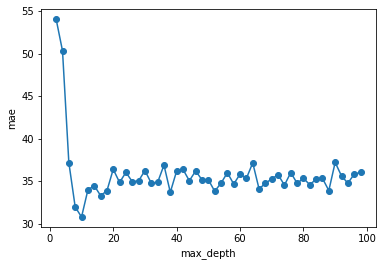

In [13]:
mae = []
for i in range(2, 100, 2):
    model = DecisionTreeClassifier(criterion='gini', max_depth=i, splitter='best').fit(X_train, y_train)
    ypred = model.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,100,2), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()


In [14]:
model = DecisionTreeClassifier(criterion='gini', max_depth=11, random_state=0).fit(X_train, y_train)
ypred = model.predict(X_test)

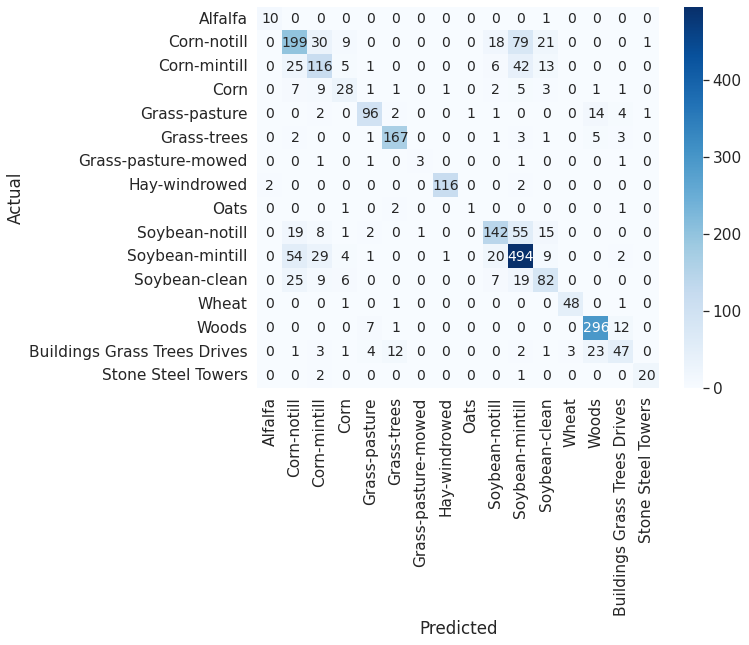

In [15]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_ip, index = names_ip)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [18]:
print(classification_report(y_test, ypred, target_names = names_ip))

                              precision    recall  f1-score   support

                     Alfalfa       0.83      0.91      0.87        11
                 Corn-notill       0.60      0.56      0.58       357
                Corn-mintill       0.56      0.56      0.56       208
                        Corn       0.50      0.47      0.49        59
               Grass-pasture       0.84      0.79      0.82       121
                 Grass-trees       0.90      0.91      0.91       183
         Grass-pasture-mowed       0.75      0.43      0.55         7
               Hay-windrowed       0.98      0.97      0.97       120
                        Oats       0.50      0.20      0.29         5
              Soybean-notill       0.72      0.58      0.65       243
             Soybean-mintill       0.70      0.80      0.75       614
               Soybean-clean       0.56      0.55      0.56       148
                       Wheat       0.94      0.94      0.94        51
                   

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(model.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

##KNN

In [13]:
parameters = {'weights':('uniform', 'distance'), 'algorithm':('auto', 'brute', 'ball_tree', 'kd_tree'), 
              'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'metric':['euclidean','manhattan']}
knn = neighbors.KNeighborsClassifier()
grid = GridSearchCV(knn, parameters)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Acc', acc)
print(grid.best_params_)

Acc 0.8002341006632853
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


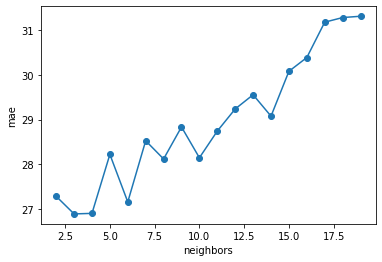

In [11]:
mae = []
for i in range(2, 20, 1):
    knn = neighbors.KNeighborsClassifier(i, weights='distance', algorithm='auto', metric='manhattan').fit(X_train, y_train)
    ypred = knn.predict(X_test)
    maev = mean_absolute_error(y_test,ypred)
    mae.append(maev)

# Plot mae   
plt.plot(range(2,20,1), mae, marker='o')
plt.xlabel('neighbors')
plt.ylabel('mae')
plt.show()


In [14]:
knn = neighbors.KNeighborsClassifier(4, weights='distance', algorithm='auto', metric='manhattan').fit(X_train, y_train)
ypred = knn.predict(X_test)

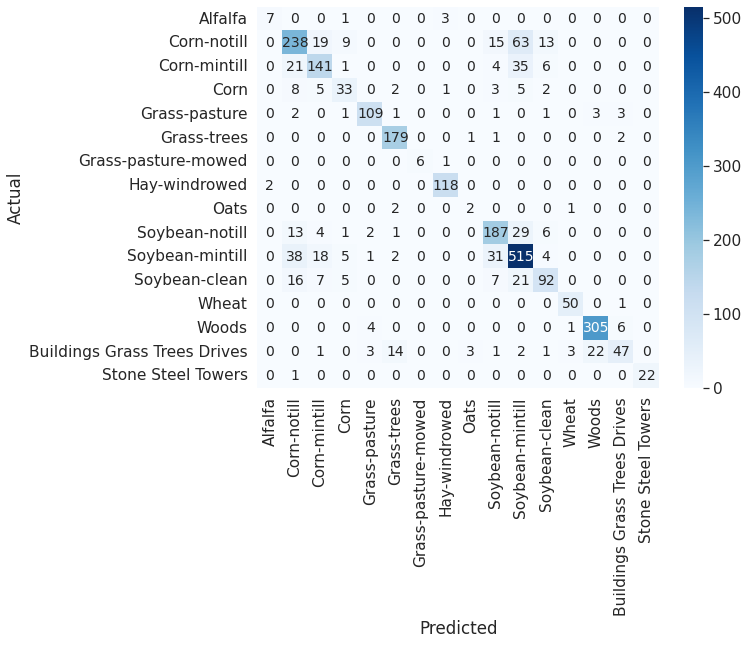

In [16]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_ip, index = names_ip)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, fmt='d')
plt.savefig('cmap.png', dpi=400)

In [18]:
print(classification_report(y_test, ypred, target_names = names_ip))

                              precision    recall  f1-score   support

                     Alfalfa       0.78      0.64      0.70        11
                 Corn-notill       0.71      0.67      0.69       357
                Corn-mintill       0.72      0.68      0.70       208
                        Corn       0.59      0.56      0.57        59
               Grass-pasture       0.92      0.90      0.91       121
                 Grass-trees       0.89      0.98      0.93       183
         Grass-pasture-mowed       1.00      0.86      0.92         7
               Hay-windrowed       0.96      0.98      0.97       120
                        Oats       0.33      0.40      0.36         5
              Soybean-notill       0.75      0.77      0.76       243
             Soybean-mintill       0.77      0.84      0.80       614
               Soybean-clean       0.74      0.62      0.67       148
                       Wheat       0.91      0.98      0.94        51
                   

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(knn.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()

# REDES NEURONALES

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math

In [15]:
X_train[0].shape

(40,)

In [28]:
funcion = ['LeakyReLU','sigmoid','relu','softmax']

for i in range(0,len(funcion)):
  modelo = tf.keras.Sequential([
      tf.keras.layers.Dense(units=26,input_shape=X_train[0].shape, activation=funcion[i]),
      tf.keras.layers.Dense(17, activation='softmax')
  ])
  modelo.summary()
  modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
  historial = modelo.fit(X_train,y_train, epochs=100, verbose=False)
  predicciones = modelo.predict(X_test)
  results = modelo.evaluate(X_test, y_test)
  print("funcion,test loss, test acc:",funcion[i], results)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 26)                1066      
                                                                 
 dense_38 (Dense)            (None, 17)                459       
                                                                 
Total params: 1,525
Trainable params: 1,525
Non-trainable params: 0
_________________________________________________________________
81/81 [==============================] - 0s 1ms/step - loss: 4.4130 - accuracy: 0.6680
funcion,test loss, test acc: LeakyReLU [4.413035869598389, 0.6679672002792358]
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 26)                1066      
                                                            

In [ ]:
modelo = tf.keras.Sequential([
      tf.keras.layers.Dense(units=41,input_shape=X_train[0].shape, activation='relu'),
      tf.keras.layers.Dense(17, activation='softmax')
  ])
modelo.summary()
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [12]:
historial = modelo.fit(X_train,y_train, epochs=1000, verbose=False)

In [42]:
print(historial.history['accuracy'][200])
print(historial.history['loss'][200])

0.8250064849853516
0.7581571936607361


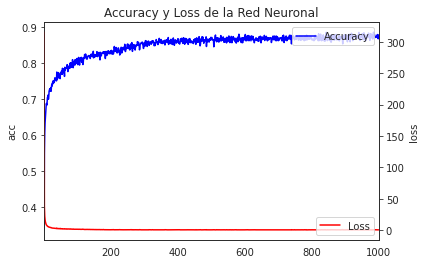

In [38]:
acc = historial.history['accuracy']
loss = historial.history['loss']

epochs   = range(1,len(acc)+1,1)


fig = plt.figure()
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(epochs, acc, 'b',label = 'Accuracy')
ax1.set_ylabel('acc')
ax1.set_title('Accuracy y Loss de la Red Neuronal')
 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(epochs, loss, 'r', label = 'Loss')
ax2.set_xlim([1, len(acc)+1])
ax2.set_ylabel('loss')
ax2.set_xlabel('Iteraciones')
 
leg1 = ax1.legend(loc='upper right')
leg2 = ax2.legend(loc='lower right')


In [39]:
  predicciones = modelo.predict(X_test)
  results = modelo.evaluate(X_test, y_test)
  print("test loss, test acc:", results)

81/81 [==============================] - 0s 1ms/step - loss: 3.1762 - accuracy: 0.8342
test loss, test acc: [3.176215887069702, 0.8341786861419678]


Vemos que con una capa oculta, la accuracy máxima conseguida con 100 pasadas es de 0,81 aprox en la pasada 96. Intentamos meter más capas ocultas para mejorar los resultados.

In [50]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=30,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(23, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])
modelo.summary()
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                1230      
                                                                 
 dense_12 (Dense)            (None, 23)                713       
                                                                 
 dense_13 (Dense)            (None, 17)                408       
                                                                 
Total params: 2,351
Trainable params: 2,351
Non-trainable params: 0
_________________________________________________________________


In [51]:
historial = modelo.fit(X_train,y_train, epochs=1000, verbose=False)
print('acc: ', historial.history['accuracy'][999])
print('loss: ',historial.history['loss'][999])

acc:  0.914259672164917
loss:  0.2665248513221741


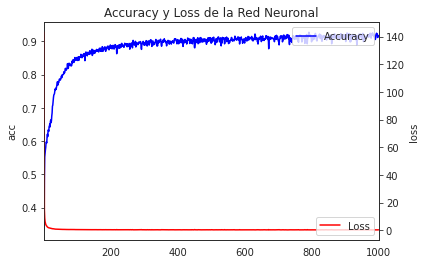

In [52]:
acc = historial.history['accuracy']
loss = historial.history['loss']

epochs   = range(1,len(acc)+1,1)


fig = plt.figure()
sns.set_style('white')
ax1 = fig.add_subplot(111)
ax1.plot(epochs, acc, 'b',label = 'Accuracy')
ax1.set_ylabel('acc')
ax1.set_title('Accuracy y Loss de la Red Neuronal')
 
ax2 = ax1.twinx()  # this is the important function
ax2.plot(epochs, loss, 'r', label = 'Loss')
ax2.set_xlim([1, len(acc)+1])
ax2.set_ylabel('loss')
ax2.set_xlabel('Iteraciones')
 
leg1 = ax1.legend(loc='upper right')
leg2 = ax2.legend(loc='lower right')


In [53]:
predicciones = modelo.predict(X_test)

In [54]:
results = modelo.evaluate(X_test, y_test)
print("test loss, test acc:", results)

81/81 [==============================] - 0s 2ms/step - loss: 2.6273 - accuracy: 0.8287
test loss, test acc: [2.6272759437561035, 0.8287163376808167]


In [ ]:
ini_0=28
ini_1=20
count=0
for i in range(ini_0,ini_0+7):
  for j in range(ini_1,ini_1+10):
    count +=1
    modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=i,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(j, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
    ])
    modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
    historial = modelo.fit(X_train,y_train, epochs=1000, verbose=False)
    results = modelo.evaluate(X_test, y_test)
    print("test loss, test acc:", results, 'params->i:', i, 'j:', j, 'repetición:', count)

81/81 [==============================] - 0s 2ms/step - loss: 2.9853 - accuracy: 0.6964
test loss, test acc: [2.985267162322998, 0.6964494585990906] params->i: 28 j: 20 repetición: 1
81/81 [==============================] - 0s 1ms/step - loss: 2.2389 - accuracy: 0.8361
test loss, test acc: [2.238922595977783, 0.8361295461654663] params->i: 28 j: 21 repetición: 2
81/81 [==============================] - 0s 2ms/step - loss: 1.6127 - accuracy: 0.8513
test loss, test acc: [1.612654447555542, 0.8513460755348206] params->i: 28 j: 22 repetición: 3
81/81 [==============================] - 0s 1ms/step - loss: 2.0819 - accuracy: 0.8467
test loss, test acc: [2.081866979598999, 0.8466640710830688] params->i: 28 j: 23 repetición: 4
81/81 [==============================] - 0s 1ms/step - loss: 2.2713 - accuracy: 0.8424
test loss, test acc: [2.2712624073028564, 0.8423722386360168] params->i: 28 j: 24 repetición: 5
81/81 [==============================] - 0s 1ms/step - loss: 1.3123 - accuracy: 0.8326
te

In [11]:
    modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=35,input_shape=X_train[0].shape, activation='relu'),
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
    ])
    modelo.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
    historial = modelo.fit(X_train,y_train, epochs=500, verbose=True)
    results = modelo.evaluate(X_test, y_test)
    print("test loss, test acc:", results)

Epoch 1/500
241/241 [==============================] - 2s 3ms/step - loss: 131.7829 - accuracy: 0.4085
Epoch 2/500
241/241 [==============================] - 1s 3ms/step - loss: 17.9792 - accuracy: 0.5651
Epoch 3/500
241/241 [==============================] - 1s 4ms/step - loss: 11.3805 - accuracy: 0.5990
Epoch 4/500
241/241 [==============================] - 1s 3ms/step - loss: 8.6225 - accuracy: 0.6122
Epoch 5/500
241/241 [==============================] - 1s 3ms/step - loss: 6.6849 - accuracy: 0.6308
Epoch 6/500
241/241 [==============================] - 1s 3ms/step - loss: 5.6111 - accuracy: 0.6384
Epoch 7/500
241/241 [==============================] - 0s 2ms/step - loss: 4.4181 - accuracy: 0.6586
Epoch 8/500
241/241 [==============================] - 0s 2ms/step - loss: 4.0707 - accuracy: 0.6572
Epoch 9/500
241/241 [==============================] - 0s 2ms/step - loss: 3.4835 - accuracy: 0.6633
Epoch 10/500
241/241 [==============================] - 0s 2ms/step - loss: 3.0903 - ac

In [25]:
predicciones = modelo.predict(X_test)
ypred = np.argmax(predicciones, axis=1)

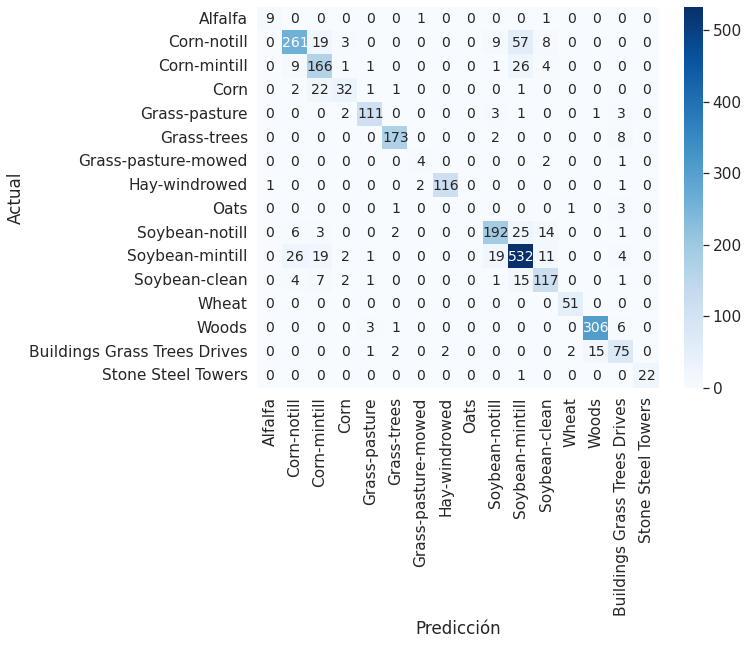

In [26]:
data = metrics.confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=names_ip, index = names_ip)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicción'
plt.figure(figsize = (9,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, fmt='d')

In [27]:
print(classification_report(y_test, ypred, target_names = names_ip))

                              precision    recall  f1-score   support

                     Alfalfa       0.90      0.82      0.86        11
                 Corn-notill       0.85      0.73      0.78       357
                Corn-mintill       0.70      0.80      0.75       208
                        Corn       0.76      0.54      0.63        59
               Grass-pasture       0.93      0.92      0.93       121
                 Grass-trees       0.96      0.95      0.95       183
         Grass-pasture-mowed       0.57      0.57      0.57         7
               Hay-windrowed       0.98      0.97      0.97       120
                        Oats       0.00      0.00      0.00         5
              Soybean-notill       0.85      0.79      0.82       243
             Soybean-mintill       0.81      0.87      0.84       614
               Soybean-clean       0.75      0.79      0.77       148
                       Wheat       0.94      1.00      0.97        51
                   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
